In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:

data_dir = "../kaggle/working/chess"

# Initialize the image data generator with a rescaling factor and a validation split.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create the training data generator.
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Create the validation data generator.
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True 
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100
)

Epoch 1/100


13/13 [==============================] - 12s 867ms/step - loss: 3.2366 - accuracy: 0.1512 - val_loss: 2.5512 - val_accuracy: 0.1875
Epoch 2/100
13/13 [==============================] - 10s 791ms/step - loss: 2.4909 - accuracy: 0.1927 - val_loss: 2.4130 - val_accuracy: 0.1771
Epoch 3/100
13/13 [==============================] - 10s 788ms/step - loss: 2.3514 - accuracy: 0.1854 - val_loss: 2.2741 - val_accuracy: 0.1979
Epoch 4/100
13/13 [==============================] - 10s 790ms/step - loss: 2.2325 - accuracy: 0.1927 - val_loss: 2.1893 - val_accuracy: 0.1875
Epoch 5/100
13/13 [==============================] - 10s 799ms/step - loss: 2.1498 - accuracy: 0.1947 - val_loss: 2.1161 - val_accuracy: 0.2188
Epoch 6/100
13/13 [==============================] - 11s 865ms/step - loss: 2.0978 - accuracy: 0.2098 - val_loss: 2.0741 - val_accuracy: 0.1562
Epoch 7/100
13/13 [==============================] - 10s 792ms/step - loss: 2.0532 - accuracy: 0.1683 - val_loss: 2.0305 - val_accurac

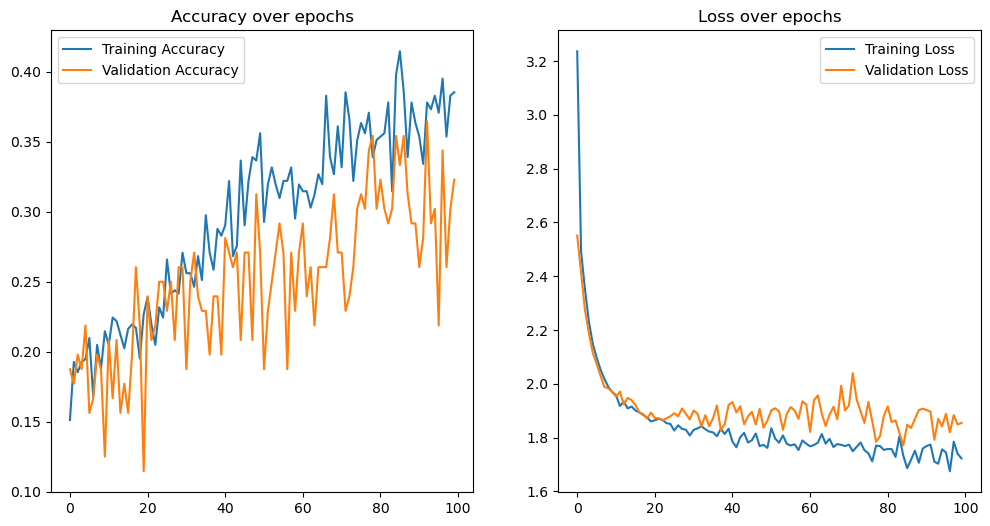

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()

plt.show()

In [6]:
model.save('model_jcm_01.h5')

c:\Users\jcast\.conda\envs\arquitectura\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
